#Model Data PreProcessing


In [1]:
%cd /content/drive/MyDrive/Projects/Security_Project

/content/drive/MyDrive/Projects/Security_Project


In [2]:
!nvidia-smi

Mon Aug 18 15:18:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             47W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
%pip uninstall -y ultralytics
%pip install --no-cache-dir ultralytics
%pip install opencv-python-headless -q
# %pip install roboflow -q #this only used when and if i needed data from roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 303.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 308.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 310.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 336.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 284.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 273.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 294.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 245.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 269.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 224.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 222.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjit

In [ ]:

# ==================================================
# Checks Video Quality
# ==================================================

# from ultralytics import YOLO
# import cv2
# import os
# import csv

# model = YOLO("yolov11l-pose.pt")  # Replace with your fine-tuned model if available

# video_folder = '/content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model'
# output_csv = "video_scores.csv"

# def score_video(video_path, frame_skip=10):
#     cap = cv2.VideoCapture(video_path)
#     frame_count = 0
#     detection_count = 0
#     total_frames = 0

#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break

#         if frame_count % frame_skip == 0:
#             results = model(frame)
#             if results[0].boxes:
#                 detection_count += len(results[0].boxes)

#         frame_count += 1
#         total_frames += 1

#     cap.release()
#     return detection_count, total_frames

# with open(output_csv, 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(["video_path", "detections", "total_frames", "detection_ratio"])

#     for root, _, files in os.walk(video_folder):
#       for file in files:
#           if file.endswith(('.mp4', '.mov', '.avi', '.mpg', '.mpeg', '.wmv')):
#               path = os.path.join(root, file)
#               detections, frames = score_video(path)
#               ratio = detections / frames if frames else 0
#               writer.writerow([path, detections, frames, round(ratio, 4)])


In [ ]:
from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.8/235.7 GB disk)


In [5]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab import drive

print("Libraries imported.") #checkpoints for me to see when things have been done properly

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Libraries imported.


In [7]:
# ==================================================
# Paths (update these to match your Google Drive setup)
# ==================================================
INPUT_VIDEO_PATH = '/content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model'
OUTPUT_DATA_PATH = '/content/drive/MyDrive/Projects/Security_Project/behaviour_project/2_processed_data'
MODEL_SAVE_PATH = '/content/drive/MyDrive/Projects/Security_Project/behaviour_project/3_trained_models'

# Ensure output directories exist
os.makedirs(OUTPUT_DATA_PATH, exist_ok=True)
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

print(f"Input path: {INPUT_VIDEO_PATH}")
print(f"Output path: {OUTPUT_DATA_PATH}")
print(f"Model save path: {MODEL_SAVE_PATH}")


Input path: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model
Output path: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/2_processed_data
Model save path: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/3_trained_models


In [8]:
# We use YOLOv8's pre-trained pose estimation model.
# This model is excellent at finding a person and their keypoints.
pose_model = YOLO('yolo11l-pose.pt')
pose_model.to('cuda')
pose_model.overrides['imgsz'] = 640
print("YOLOv11-Pose model loaded.")

YOLOv11-Pose model loaded.


In [ ]:
# ==================================================
# Constants
# ==================================================
NUM_KEYPOINTS = 17
FEATURES_PER_KEYPOINT = 2
MAX_SEQ_LENGTH = 150          # Fixed number of frames
FRAME_INTERVAL = 15           # Sample every Nth frame
RESIZE_DIM = (640, 480)       # Resize for consistency


# ==================================================
# Process a single video into keypoints
# ==================================================
def process_video_to_keypoints(video_path, output_path, pose_model):
    """
    Extracts human pose keypoints from a video using YOLO pose model.
    Saves each video as a fixed-length numpy array of shape (MAX_SEQ_LENGTH, 34).
    """
    try:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f" Error: Could not open video {video_path}")
            return

        all_keypoints = []
        frame_count = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Skip frames to reduce redundancy
            if frame_count % FRAME_INTERVAL != 0:
                frame_count += 1
                continue
            frame_count += 1

            # Resize for consistency
            frame = cv2.resize(frame, RESIZE_DIM)

            # Run YOLO pose model
            results = pose_model(frame, verbose=False)

            # Extract keypoints (x, y only)
            if results and results[0].keypoints and len(results[0].keypoints.xy) > 0:
                xy = results[0].keypoints.xy[0].cpu().numpy()   # (17, 2)
                frame_keypoints = xy.flatten()                  # (34,)

                if frame_keypoints.shape[0] == NUM_KEYPOINTS * FEATURES_PER_KEYPOINT:
                    all_keypoints.append(frame_keypoints)

        cap.release()

        if not all_keypoints:
            print(f" No valid keypoints found in {video_path}")
            return

        keypoints_array = np.array(all_keypoints)

        # Normalize (zero-center each sequence)
        keypoints_array -= keypoints_array.mean(axis=0)

        # Pad or truncate to fixed length
        if keypoints_array.shape[0] < MAX_SEQ_LENGTH:
            pad_len = MAX_SEQ_LENGTH - keypoints_array.shape[0]
            pad = np.zeros((pad_len, keypoints_array.shape[1]))
            keypoints_array = np.vstack([keypoints_array, pad])
        else:
            keypoints_array = keypoints_array[:MAX_SEQ_LENGTH]

        # Validate shape
        if keypoints_array.shape != (MAX_SEQ_LENGTH, NUM_KEYPOINTS * FEATURES_PER_KEYPOINT):
            print(f" Shape mismatch for {video_path}, got {keypoints_array.shape}")
            return

        # Save
        np.save(output_path, keypoints_array)
        print(f" Saved: {output_path}")

    except Exception as e:
        print(f" Error processing {video_path}: {e}")

In [ ]:
print("--- Starting Processing Loop ---")

if not os.path.exists(INPUT_VIDEO_PATH):
    print(f"CRITICAL ERROR: Input path does not exist: {INPUT_VIDEO_PATH}")
else:
    for root, dirs, files in os.walk(INPUT_VIDEO_PATH):
        for file in files:
            if file.lower().endswith(('.mp4', '.mov', '.avi', '.mpg', '.mpeg', '.wmv')):
                video_path = os.path.join(root, file)

                # Mirror input folder structure in OUTPUT_DATA_PATH
                relative_path = os.path.relpath(root, INPUT_VIDEO_PATH)
                output_dir = os.path.join(OUTPUT_DATA_PATH, relative_path)
                os.makedirs(output_dir, exist_ok=True)

                safe_video_name = file.replace(" ", "_")
                output_path = os.path.join(output_dir, f"{safe_video_name}.npy")

                if os.path.exists(output_path):
                    print(f" Skipping '{file}' (already processed)")
                    continue

                print(f" Processing video: {video_path}...")
                process_video_to_keypoints(video_path, output_path, pose_model)

print("\n --- Processing Loop Finished! ---")

Streaming output truncated to the last 5000 lines.
🎥 Processing video: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model/action/Arrest/Arrest023_x264.mp4...
✅ Saved: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/2_processed_data/action/Arrest/Arrest023_x264.mp4.npy
🎥 Processing video: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model/action/Arrest/Arrest024_x264.mp4...
✅ Saved: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/2_processed_data/action/Arrest/Arrest024_x264.mp4.npy
🎥 Processing video: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model/action/Arrest/Arrest037_x264.mp4...
✅ Saved: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/2_processed_data/action/Arrest/Arrest037_x264.mp4.npy
🎥 Processing video: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model/action/Arrest/Arrest038_x264.mp4...
✅ Saved: /content/drive/MyDrive/Pro

#Training Your Behavioural Model

In [1]:
%cd /content/drive/MyDrive/Projects/Security_Project

/content/drive/MyDrive/Projects/Security_Project


In [7]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 126.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is in

In [8]:
!pip install --upgrade scipy # run this once before training starts on Colab

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Paths
DATA_PATH = "/content/drive/MyDrive/Projects/Security_Project/behaviour_project/2_processed_data/action"
JSON_PATH = "/content/drive/MyDrive/Projects/Security_Project/behaviour_project/1_model/action/action_to_behaviour.json"

MAX_SEQ_LENGTH = 150


In [3]:
# Load the mapping: action -> behavior
with open(JSON_PATH, "r") as f:
    action_to_behavior = json.load(f)

print("Loaded mapping:", action_to_behavior)

# Behavior groups
behavior_classes = sorted(set(action_to_behavior.values()))
print("Behavior groups:", behavior_classes)


Loaded mapping: {'abuse': 'aggressive', 'assault': 'aggressive', 'assault_violence': 'aggressive', 'fighting': 'aggressive', 'grab': 'aggressive', 'hit': 'aggressive', 'kick': 'aggressive', 'sabotage_violence': 'aggressive', 'struggle': 'aggressive', 'throw': 'aggressive', 'violence': 'aggressive', 'run': 'normal', 'sit': 'normal', 'stand': 'normal', 'walk': 'normal', 'arrest': 'suspicious', 'burglary': 'suspicious', 'robbery': 'suspicious', 'shoplifting': 'suspicious', 'sneak': 'suspicious', 'stealing': 'suspicious', 'vandalism': 'suspicious', 'fall': 'unusual', 'lying_down': 'unusual', 'road_accidents': 'unusual'}
Behavior groups: ['aggressive', 'normal', 'suspicious', 'unusual']


In [ ]:
sequences = []
labels = []

# === Go inside each subfolder of "action/" ===
for action_name in os.listdir(DATA_PATH):
    action_dir = os.path.join(DATA_PATH, action_name)
    if not os.path.isdir(action_dir):
        continue

    action_key = action_name.lower()
    if action_key not in action_to_behavior:
        print(f" Skipping '{action_name}' (not in JSON mapping)")
        continue

    behavior_label = action_to_behavior[action_key]
    behavior_index = behavior_classes.index(behavior_label)

    # Load all .npy files for this action
    for file_name in os.listdir(action_dir):
        if file_name.endswith(".npy"):
            keypoints = np.load(os.path.join(action_dir, file_name))
            if keypoints.shape[0] > 0:
                sequences.append(keypoints)
                labels.append(behavior_index)

print(f"Loaded {len(sequences)} sequences across {len(behavior_classes)} behavior groups.")


⚠️ Skipping 'RoadAccidents' (not in JSON mapping)
Loaded 2930 sequences across 4 behavior groups.


In [5]:
# === Pad to uniform length ===
MAX_SEQ_LENGTH = 150
padded_sequences = pad_sequences(
    sequences, maxlen=MAX_SEQ_LENGTH, padding='pre', truncating='pre', dtype='float32'
)
labels = np.array(labels, dtype=np.int32)

print("Data shape (X):", padded_sequences.shape)
print("Data shape (y):", labels.shape)
print("Behavior groups:", behavior_classes)

Data shape (X): (2930, 150, 34)
Data shape (y): (2930,)
Behavior groups: ['aggressive', 'normal', 'suspicious', 'unusual']


In [6]:
# Pad sequences to fixed length
padded_sequences = pad_sequences(
    sequences,
    maxlen=MAX_SEQ_LENGTH,
    padding="pre",
    truncating="pre",
    dtype="float32"
)

labels = np.array(labels, dtype=np.int32)

print("Data shape (X):", padded_sequences.shape)
print("Data shape (y):", labels.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Data shape (X): (2930, 150, 34)
Data shape (y): (2930,)
Train: (2344, 150, 34) (2344,)
Test: (586, 150, 34) (586,)


In [7]:
print("Calculating class weights...")
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


Calculating class weights...
Class weights: {0: np.float64(0.45692007797270956), 1: np.float64(2.188608776844071), 2: np.float64(2.8206979542719615)}


In [8]:
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import GRU, Dense, Dropout
from keras.models import Model
from keras.regularizers import l2
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

# Input
input_shape = (MAX_SEQ_LENGTH, X_train.shape[2])
class_names = behavior_classes
num_classes = len(class_names)

inputs = Input(shape=input_shape)

# CNN block
x = Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer=l2(1e-4))(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.25)(x)

# GRU layers
x = GRU(64, return_sequences=True, recurrent_dropout=0.1)(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = GRU(32, return_sequences=False, recurrent_dropout=0.1)(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)

# Dense classifier
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile
loss_fn = SparseCategoricalCrossentropy()
model.compile(optimizer=Adam(1e-3), loss=loss_fn, metrics=['accuracy'])

model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 34)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 150, 64)        │         6,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 75, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,972 (171.77 KB)

 Trainable params: 43,652 (170.52 KB)

 Non-trainable params: 320 (1.25 KB)

Calculating class weights...
Class weights: {0: np.float64(0.45692007797270956), 1: np.float64(2.188608776844071), 2: np.float64(2.8206979542719615)}
Checkpoint found. Loading weights...

🚀 Starting training...
Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8217 - loss: 0.3701
Epoch 1: val_loss improved from inf to 0.50795, saving model to checkpoints/best_model.weights.h5
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 274ms/step - accuracy: 0.8218 - loss: 0.3701 - val_accuracy: 0.7901 - val_loss: 0.5079 - learning_rate: 0.0010
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8090 - loss: 0.3478
Epoch 2: val_loss did not improve from 0.50795
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.8089 - loss: 0.3485 - val_accuracy: 0.7918 - val_loss: 0.5111 - learning_rate: 0.0010
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8282 - loss: 0.3483
Epoch 3: val_loss did not improve from 0.50795
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 

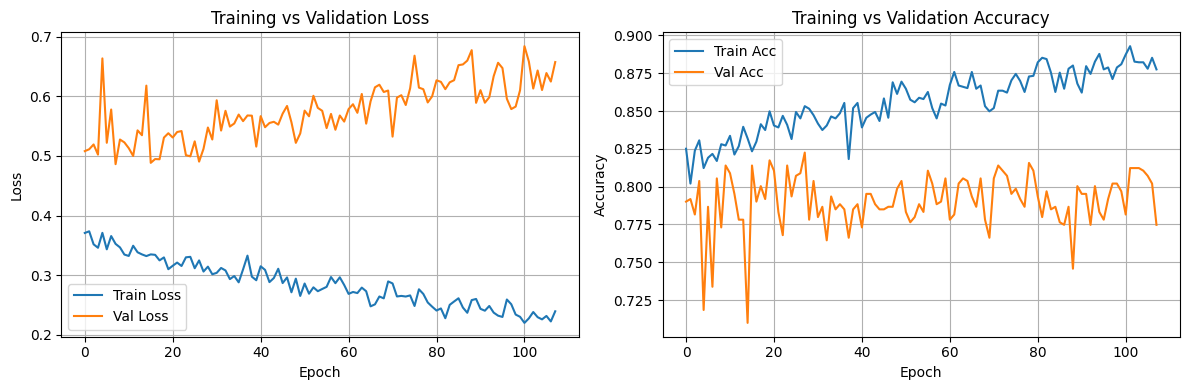

In [ ]:
# === Checkpoint Setup ===
checkpoint_path = "checkpoints/best_model.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.makedirs(checkpoint_dir, exist_ok=True)

# === Callbacks ===

# Save only the best model
checkpoint_cb = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=100,  # Reduced from 150
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate on plateau
reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=100,
    min_lr=1e-4,
    verbose=1
)

# === Compute Class Weights ===
print("Calculating class weights...")
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

# === Load Checkpoint (optional) ===
if os.path.exists(checkpoint_path):
    print("Checkpoint found. Loading weights...")
    model.load_weights(checkpoint_path)
else:
    print("No checkpoint found. Starting fresh.")

# === Compile Model with Label Smoothing ===
loss_fn = SparseCategoricalCrossentropy()

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=['accuracy']
)

# === Train the Model ===
print("\n Starting training...")
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[early_stopping_cb, reduce_lr_cb, checkpoint_cb],
    verbose=1
)

print("\n --- Training Complete! ---")

# === Plot Training History ===
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step
=== Classification Report ===
              precision    recall  f1-score   support

  aggressive       0.92      0.81      0.86       428
  suspicious       0.81      0.84      0.82        89
     unusual       0.43      0.71      0.54        69

    accuracy                           0.81       586
   macro avg       0.72      0.79      0.74       586
weighted avg       0.84      0.81      0.82       586



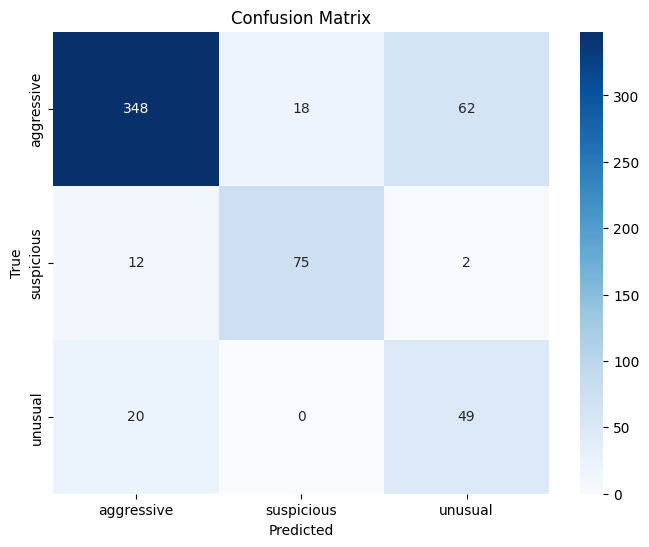


Test Loss: 0.4861
Test Accuracy: 80.55%

✅ Model saved to: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/3_model/behaviour_model.keras
✅ Class names saved to: /content/drive/MyDrive/Projects/Security_Project/behaviour_project/3_model/class_names.npy


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Paths
MODEL_SAVE_PATH = "/content/drive/MyDrive/Projects/Security_Project/behaviour_project/3_model"
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

# --- Make predictions ---
y_pred = model.predict(X_test).argmax(axis=1)

# --- Determine which labels are actually present ---
unique_labels = np.unique(np.concatenate([y_test, y_pred]))
label_names = [class_names[i] for i in unique_labels]

# --- Classification report ---
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=label_names))

# --- Confusion matrix ---
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Evaluate overall test accuracy and loss ---
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# --- Save the trained model ---
model_file = os.path.join(MODEL_SAVE_PATH, "behaviour_model.keras")
model.save(model_file)

# --- Save class names ---
class_names_file = os.path.join(MODEL_SAVE_PATH, "class_names.npy")
np.save(class_names_file, np.array(class_names))

print(f"\n Model saved to: {model_file}")
print(f" Class names saved to: {class_names_file}")
